In [ ]:
# Import liberaries
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import WordPunctTokenizer
import numpy as np
import nltk

nltk.downloader

<module 'nltk.downloader' from 'C:\\Users\\Adnan\\anaconda3\\lib\\site-packages\\nltk\\downloader.py'>

### Reading Comments

In [ ]:
df = pd.read_csv('data/lilmiquela_Comments.csv', delimiter=',')

In [ ]:
df.head()

,Post Link,Username,Comment,Time
0,https://www.instagram.com/p/CRJ3yFxBVXG/,__darkweb90210,favorite❤️,2021-07-10T21:47:27.000Z
1,https://www.instagram.com/p/CRJ3yFxBVXG/,leaa.tru,u rock every fit bbyy,2021-07-10T21:47:27.000Z
2,https://www.instagram.com/p/CRJ3yFxBVXG/,yoonyuki97,Oh my baby You're so beautiful ❤️ I Love You s...,2021-07-10T21:47:27.000Z
3,https://www.instagram.com/p/CRJ3yFxBVXG/,lahf_and_lemons,Are you all robots? And is your dog a robot too?,2021-07-10T21:47:27.000Z
4,https://www.instagram.com/p/CRJ3yFxBVXG/,itsbrittkneemarie,That BAG 🔥😍,2021-07-10T21:47:27.000Z


### Preprocessing comments

In [ ]:
def clean_comments(comment):
    comment = str(comment)
    # remove the username from comment
    user_removed = re.sub(r'@[A-Za-z0-9]+','',comment)
    # remove links from comment
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    # remove numbers from comment
    number_removed = re.sub('[^a-zA-Z]', ' ', link_removed)
    # convert all of the characters into lower space
    lower_case_comment= number_removed.lower()
    # spliting every comment sentence/text into words
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_comment)

    # Remove all extra scpaces from words and merging them back into comment text.
    cleaned_comment = (' '.join(words)).strip()

    # return cleaned_tweet.
    return cleaned_comment

In [ ]:
df['Cleaned Comments'] = df['Comment'].apply(clean_comments)

In [ ]:
df.head()

,Post Link,Username,Comment,Time,Cleaned Comments
0,https://www.instagram.com/p/CRJ3yFxBVXG/,__darkweb90210,favorite❤️,2021-07-10T21:47:27.000Z,favorite
1,https://www.instagram.com/p/CRJ3yFxBVXG/,leaa.tru,u rock every fit bbyy,2021-07-10T21:47:27.000Z,u rock every fit bbyy
2,https://www.instagram.com/p/CRJ3yFxBVXG/,yoonyuki97,Oh my baby You're so beautiful ❤️ I Love You s...,2021-07-10T21:47:27.000Z,oh my baby you re so beautiful i love you so much
3,https://www.instagram.com/p/CRJ3yFxBVXG/,lahf_and_lemons,Are you all robots? And is your dog a robot too?,2021-07-10T21:47:27.000Z,are you all robots and is your dog a robot too
4,https://www.instagram.com/p/CRJ3yFxBVXG/,itsbrittkneemarie,That BAG 🔥😍,2021-07-10T21:47:27.000Z,that bag


In [ ]:
df.shape

(11397, 5)

In [ ]:
# drop rows containing Cleaned Comments cell empty
df['Cleaned Comments'].replace('', np.nan, inplace=True)
df.dropna(subset=['Cleaned Comments'], inplace=True)

In [ ]:
df.shape

(8956, 5)

In [ ]:
df.to_csv('data/lilmiquela_Cleaned_Comments.csv', index=False)

### Get Comment’s sentiment (Extracting Features of Cleaned Comment)

In [ ]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Cleaned Comments'].apply(getSubjectivity)
df['Polarity']= df['Cleaned Comments'].apply(getPolarity)

In [ ]:
df.head()

,Post Link,Username,Comment,Time,Cleaned Comments,Subjectivity,Polarity
0,https://www.instagram.com/p/CRJ3yFxBVXG/,__darkweb90210,favorite❤️,2021-07-10T21:47:27.000Z,favorite,1.0,0.500000
1,https://www.instagram.com/p/CRJ3yFxBVXG/,leaa.tru,u rock every fit bbyy,2021-07-10T21:47:27.000Z,u rock every fit bbyy,0.4,0.400000
2,https://www.instagram.com/p/CRJ3yFxBVXG/,yoonyuki97,Oh my baby You're so beautiful ❤️ I Love You s...,2021-07-10T21:47:27.000Z,oh my baby you re so beautiful i love you so much,0.6,0.516667
3,https://www.instagram.com/p/CRJ3yFxBVXG/,lahf_and_lemons,Are you all robots? And is your dog a robot too?,2021-07-10T21:47:27.000Z,are you all robots and is your dog a robot too,0.0,0.000000
4,https://www.instagram.com/p/CRJ3yFxBVXG/,itsbrittkneemarie,That BAG 🔥😍,2021-07-10T21:47:27.000Z,that bag,0.0,0.000000


In [ ]:
# Compute negative, neutral and positive sentiments based on their scores
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df['Sentiment'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df['Sentiment'].value_counts()

Neutral     6437
Positive    1751
Negative     768
Name: Sentiment, dtype: int64

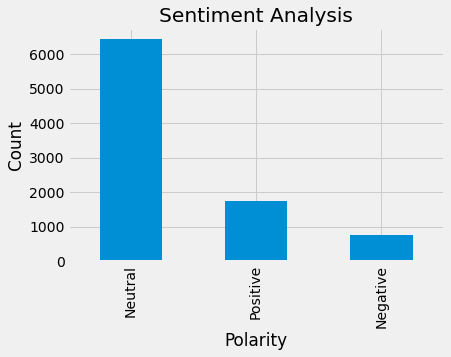

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

### Saving Scraped Comments into CSV

In [ ]:
df.to_csv('data/lilmiquela_Comments_Sentiment_Analysis.csv', index=False)

### Handle Imbalanced Dataset

In [ ]:
df_positive_comments = df[df['Sentiment']=='Positive'][:800]

In [ ]:
df_positive_comments.shape

(800, 8)

In [ ]:
df_negative_comments = df[df['Sentiment']=='Negative']

In [ ]:
df_negative_comments.shape

(768, 8)

In [ ]:
# balanced dataset
balanced_df = df_positive_comments.append(df_negative_comments)

In [ ]:
balanced_df.shape

(1568, 8)

In [ ]:
balanced_df.head()

,Post Link,Username,Comment,Time,Cleaned Comments,Subjectivity,Polarity,Sentiment
0,https://www.instagram.com/p/CRJ3yFxBVXG/,__darkweb90210,favorite❤️,2021-07-10T21:47:27.000Z,favorite,1.0,0.500000,Positive
1,https://www.instagram.com/p/CRJ3yFxBVXG/,leaa.tru,u rock every fit bbyy,2021-07-10T21:47:27.000Z,u rock every fit bbyy,0.4,0.400000,Positive
2,https://www.instagram.com/p/CRJ3yFxBVXG/,yoonyuki97,Oh my baby You're so beautiful ❤️ I Love You s...,2021-07-10T21:47:27.000Z,oh my baby you re so beautiful i love you so much,0.6,0.516667,Positive
6,https://www.instagram.com/p/CRJ3yFxBVXG/,anasophia.10_2007,You are looking really pretty😍😍😍,2021-07-10T21:47:27.000Z,you are looking really pretty,1.0,0.250000,Positive
7,https://www.instagram.com/p/CRJ3yFxBVXG/,simone56769,Wow babe the look good,2021-07-10T21:47:27.000Z,wow babe the look good,0.8,0.400000,Positive


In [ ]:
import sklearn.utils

# shuffling dataframe randomly
balanced_df = sklearn.utils.shuffle(balanced_df)

In [ ]:
balanced_df.head()

,Post Link,Username,Comment,Time,Cleaned Comments,Subjectivity,Polarity,Sentiment
10356,https://www.instagram.com/p/BjQoiAYF-Mk/,sksisusnshsishysisydisysishs,Another FUCKING ROBOT,2018-08-18T00:28:23.000Z,another fucking robot,0.800000,-0.600000,Negative
9239,https://www.instagram.com/p/Bn2UJBFFjeS/,anayarose._,How you go from pink hair to brown?,2018-11-02T16:12:46.000Z,how you go from pink hair to brown,0.300000,-0.100000,Negative
9507,https://www.instagram.com/p/BmlxL_3F0NZ/,ttamara.h,What the fuck,2019-03-02T21:25:38.000Z,what the fuck,0.600000,-0.400000,Negative
507,https://www.instagram.com/p/CMkKf4vnR41/,khalil_shahzad6,"you don't know how it tastes, right?",2021-04-15T07:31:47.000Z,you don t know how it tastes right,0.535714,0.285714,Positive
6330,https://www.instagram.com/p/B0M17Kfn0RC/,pikatato_98,That awkward moment when your thumb phases thr...,2019-08-17T00:18:56.000Z,that awkward moment when your thumb phases thr...,1.000000,-0.600000,Negative


### Comments Classifier

In [ ]:
#tokenizing cleaned text for vectorizing
balanced_df["Tokenized"]=balanced_df['Cleaned Comments'].apply(lambda x : nltk.word_tokenize(x))

In [ ]:
balanced_df.head()

,Post Link,Username,Comment,Time,Cleaned Comments,Subjectivity,Polarity,Sentiment,Tokenized
10356,https://www.instagram.com/p/BjQoiAYF-Mk/,sksisusnshsishysisydisysishs,Another FUCKING ROBOT,2018-08-18T00:28:23.000Z,another fucking robot,0.800000,-0.600000,Negative,"[another, fucking, robot]"
9239,https://www.instagram.com/p/Bn2UJBFFjeS/,anayarose._,How you go from pink hair to brown?,2018-11-02T16:12:46.000Z,how you go from pink hair to brown,0.300000,-0.100000,Negative,"[how, you, go, from, pink, hair, to, brown]"
9507,https://www.instagram.com/p/BmlxL_3F0NZ/,ttamara.h,What the fuck,2019-03-02T21:25:38.000Z,what the fuck,0.600000,-0.400000,Negative,"[what, the, fuck]"
507,https://www.instagram.com/p/CMkKf4vnR41/,khalil_shahzad6,"you don't know how it tastes, right?",2021-04-15T07:31:47.000Z,you don t know how it tastes right,0.535714,0.285714,Positive,"[you, don, t, know, how, it, tastes, right]"
6330,https://www.instagram.com/p/B0M17Kfn0RC/,pikatato_98,That awkward moment when your thumb phases thr...,2019-08-17T00:18:56.000Z,that awkward moment when your thumb phases thr...,1.000000,-0.600000,Negative,"[that, awkward, moment, when, your, thumb, pha..."


In [ ]:
# replacing Sentiment Values (Positive, Negative) with 1 and 0 respectively
balanced_df['Sentiment'] = balanced_df['Sentiment'].replace(['Positive'], 1)
balanced_df['Sentiment'] = balanced_df['Sentiment'].replace(['Negative'], 0)

In [ ]:
balanced_df.head()

,Post Link,Username,Comment,Time,Cleaned Comments,Subjectivity,Polarity,Sentiment,Tokenized
10356,https://www.instagram.com/p/BjQoiAYF-Mk/,sksisusnshsishysisydisysishs,Another FUCKING ROBOT,2018-08-18T00:28:23.000Z,another fucking robot,0.800000,-0.600000,0,"[another, fucking, robot]"
9239,https://www.instagram.com/p/Bn2UJBFFjeS/,anayarose._,How you go from pink hair to brown?,2018-11-02T16:12:46.000Z,how you go from pink hair to brown,0.300000,-0.100000,0,"[how, you, go, from, pink, hair, to, brown]"
9507,https://www.instagram.com/p/BmlxL_3F0NZ/,ttamara.h,What the fuck,2019-03-02T21:25:38.000Z,what the fuck,0.600000,-0.400000,0,"[what, the, fuck]"
507,https://www.instagram.com/p/CMkKf4vnR41/,khalil_shahzad6,"you don't know how it tastes, right?",2021-04-15T07:31:47.000Z,you don t know how it tastes right,0.535714,0.285714,1,"[you, don, t, know, how, it, tastes, right]"
6330,https://www.instagram.com/p/B0M17Kfn0RC/,pikatato_98,That awkward moment when your thumb phases thr...,2019-08-17T00:18:56.000Z,that awkward moment when your thumb phases thr...,1.000000,-0.600000,0,"[that, awkward, moment, when, your, thumb, pha..."


In [ ]:
from sklearn.model_selection import train_test_split

# splitting dataset into train and test
np.random.seed(24)
X_train, X_test, y_train, y_test = train_test_split(balanced_df['Cleaned Comments'], balanced_df['Sentiment'], test_size=0.2)

#### Using TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_vect = tfidf_vect.transform(X_train)
X_test_vect = tfidf_vect.transform(X_test)

In [ ]:
X_test_vect.shape

(314, 1980)

#### 1- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Linear Model
LR = LogisticRegression().fit(X_train_vect, y_train.values.ravel())

#### 2- SVM

In [ ]:
from sklearn.svm import SVC

#SVM Classifier
SV = SVC().fit(X_train_vect, y_train.values.ravel())

#### 3-Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Naive Bayes
NV = MultinomialNB().fit(X_train_vect, y_train.values.ravel())

### Models Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Evaluate the predictions of the model on the test set
def score_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred,zero_division=1)
    recall = recall_score(y_test, y_pred)
    print('Model : {}\n \nPrecision: {}  \nRecall: {}  \nAccuracy: {}\n'.format(model,
        round(precision*100, 2), round(recall*100, 2), round((y_pred==y_test).sum()/len(y_pred)*100, 2)))

In [ ]:
classifiers = pd.Series([LR,SV, NV])

In [ ]:
classifiers.apply(lambda x: score_model(x,X_test_vect,y_test))

Model : LogisticRegression()
 
Precision: 94.19  
Recall: 87.95  
Accuracy: 90.76

Model : SVC()
 
Precision: 94.81  
Recall: 87.95  
Accuracy: 91.08

Model : MultinomialNB()
 
Precision: 92.02  
Recall: 90.36  
Accuracy: 90.76



0    None
1    None
2    None
dtype: object